In [1]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=4, rc={"lines.markersize": 15})
plt.rc('hatch', color='white', linewidth=4)
plt.rcParams.update({
    "font.family": "serif",
     "font.serif": [] ,
      "font.sans-serif": []  })

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results'

output_directory = WRITE_DIRECTORY_ROOT + '/openml/model_materialization'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [2]:
MODE = 'remote'
result_folder = ROOT_RESULT_FOLDER + '/' + MODE + '/model_materialization/openml'
result_file = result_folder + '/cloud-41/2019-10-14/13-41.csv'

In [26]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'pipeline', 'setup', 'type', 'mat_budget','score',
    'current_run_time', 'best_setup', 'best_pipeline', 'best_score',
    'best_run_time', 'total_run_time'
]

method_map = {'optimized': 'CO', 'baseline': 'OML'}
execution_times = pd.read_csv(result_file, header=None, names=HEADERS)

execution_times['cumulative_best_run_time'] = execution_times.groupby(['exp_id', 'type','mat_budget'])['best_run_time'].apply(lambda x: x.cumsum())
execution_times['cumulative_run_time'] = execution_times.groupby(['exp_id', 'type','mat_budget'])['total_run_time'].apply(lambda x: x.cumsum())
execution_times['mat_budget'] = execution_times['mat_budget'] / (1024. * 1024.)
execution_times['cumulative_current_run_time'] = execution_times.groupby(['exp_id', 'type','mat_budget'])['current_run_time'].apply(lambda x: x.cumsum())
execution_times['workload'] = execution_times.groupby(['exp_id', 'type','mat_budget']).cumcount() + 1
execution_times['type'] = execution_times['type'].replace(method_map)

In [24]:
def plot_executions_time(df, y='cumulative_run_time',loc=None):
    plt.figure(figsize=(7,4))
    plot = sns.lineplot(
        data=df,
        x='workload',
        y=y,
        hue='type',
        style='type',
        #markers=["^", "o"],
        lw=3,
        hue_order=['OML', 'CO'],
       # style_order = ['baseline', 'optimized'],
        dashes=[(2, 2), (1, 0)],
        palette={
            'CO': SYSTEM_COLOR,
            'OML': BASELINE_COLOR
        },
        legend='brief')

    legend = plt.legend(
            loc='upper left',
            #fontsize=38,
            #handlelength=1.2,
            handletextpad=0.1,
            labelspacing=0.0,
            bbox_to_anchor=(-.08, 1.3))
    legend.texts[0].set_text("")
    for line in legend.get_lines():
        line.set_linewidth(3.0)
    #top = df['run_time'].max()
    #cat.set_axis_labels('Execution Number', 'Run Time (s)')
    plot.set_xlabel('OpenML Workload', fontsize=30)
    plot.set_ylabel('Cumulative Run Time (s)', fontsize=30)
    plt.tick_params(labelsize=30)
    #plot.set_xlim((1,2))
    #plot.set_ylim((0,2200))
    #plot.set_xticks(range(1,9))
    #plot.set_xticklabels(range(1,9))
    if loc is not None:
        plt.savefig(loc, bbox_inches ='tight')

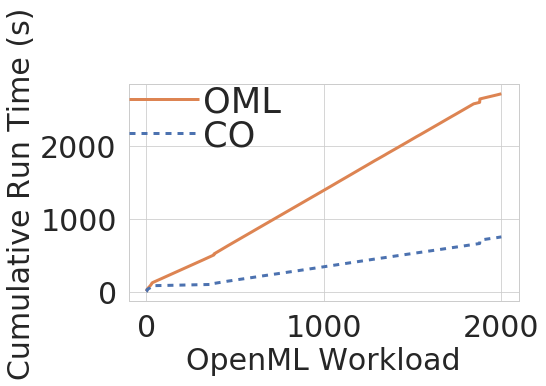

In [43]:
df = execution_times[(execution_times.mat_budget == 1.0) | (execution_times.type == 'OML')]
#plot_executions_time(df, y='cumulative_run_time')
plot_executions_time(df, y='cumulative_run_time',loc=output_directory+'/cumulative-runtime.pgf')


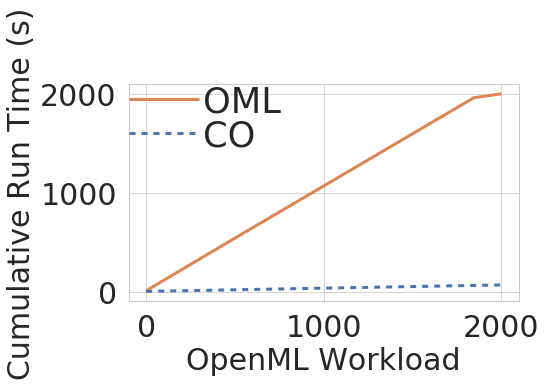

In [44]:
#plot_executions_time(df, y='cumulative_best_run_time')
plot_executions_time(df, y='cumulative_best_run_time',loc=output_directory+'/bestpipeline-overhead.pgf')

In [8]:
def best_current_runs(df, loc=None):
    plt.figure(figsize=(10,4))
    plot = sns.lineplot(
        data=df,
        x='workload',
        y='cumulative_current_run_time',
        hue='type',
        style='type',
        #markers=["^", "o"],
        lw=3,
        hue_order=['OML', 'CO'],
       # style_order = ['baseline', 'optimized'],
        dashes=[(2, 2), (1, 0)],
        palette={
            'CO': SYSTEM_COLOR,
            'OML': BASELINE_COLOR
        },
        legend='brief')

    legend = plot.legend()
    legend.texts[0].set_text("")
    for line in legend.get_lines():
        line.set_linewidth(3.0)
    #top = df['run_time'].max()
    #cat.set_axis_labels('Execution Number', 'Run Time (s)')
    plot.set_xlabel('Workload', fontsize=22)
    plot.set_ylabel('Cumulative Run Time (s)', fontsize=22)
    #plot.set_xlim((1,2))
    #plot.set_ylim((0,2200))
    #plot.set_xticks(range(1,9))
    #plot.set_xticklabels(range(1,9))
    if loc is not None:
        plt.savefig(loc, bbox_inches ='tight')

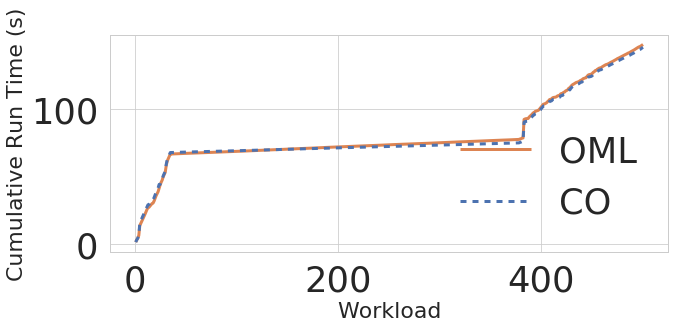

In [9]:
best_current_runs(execution_times)